In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("LoanApprovalPrediction.csv")

# Preview the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- Summary statistics for numerical columns ---
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\n--- Summary Statistics (Numerical) ---")
print(df[numerical_cols].describe())

# --- Summary statistics for categorical columns ---
categorical_cols = df.select_dtypes(include='object').columns

print("\n--- Summary Statistics (Categorical) ---")
print(df[categorical_cols].describe())

# Unique values per categorical column
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Dataset shape: (598, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

--- Summary Statistics (Numerical) ---
       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  586.000000       598.000000         598.000000  577.000000   
mean     0.755973      5292.252508        1631.499866  144.968804   
std      1.007751      5807.265364        2953.315785   82.704182   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      0.000000      3806.000000        1211.500000  127.000000   
75%      1.750000      5746.000000        2324.000000  167.000000   
max      3.000000     81000.000000       41667.000000  650.000000   

       Loan_Amount_Term  Credit_History  
count        584.000000      549.000000  
mean         341.91

Columns with missing values: ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


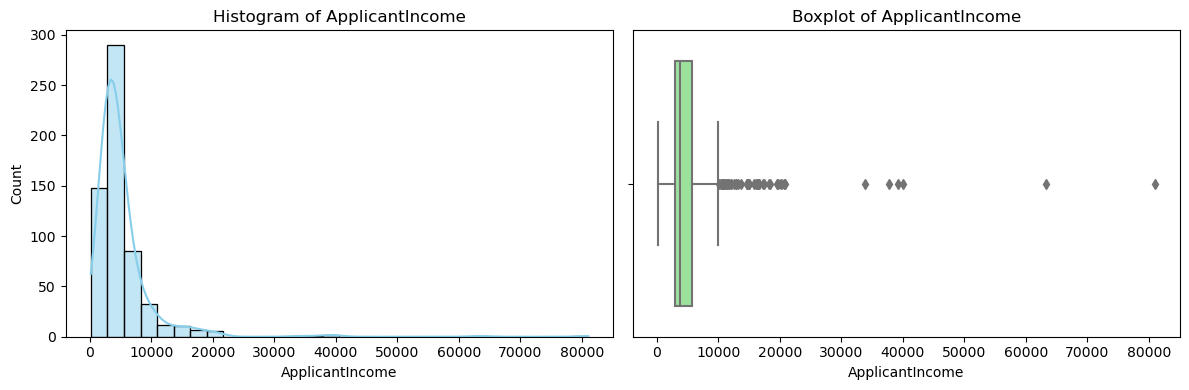

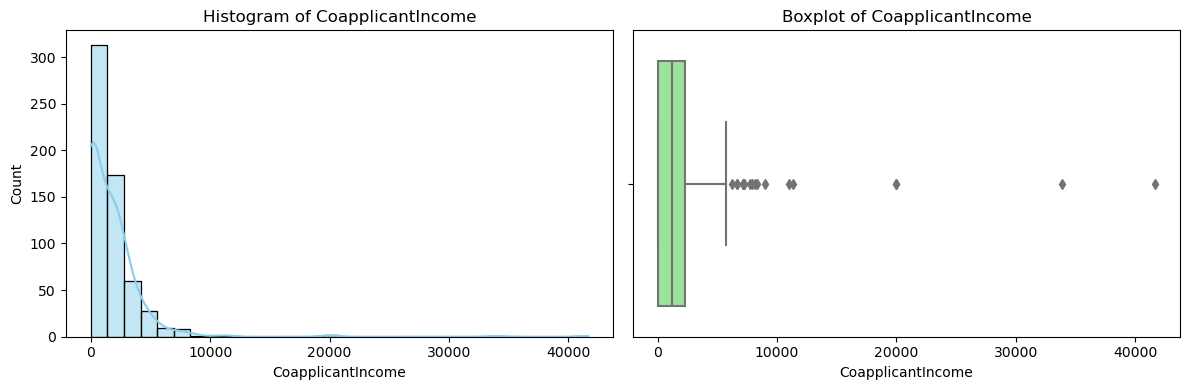

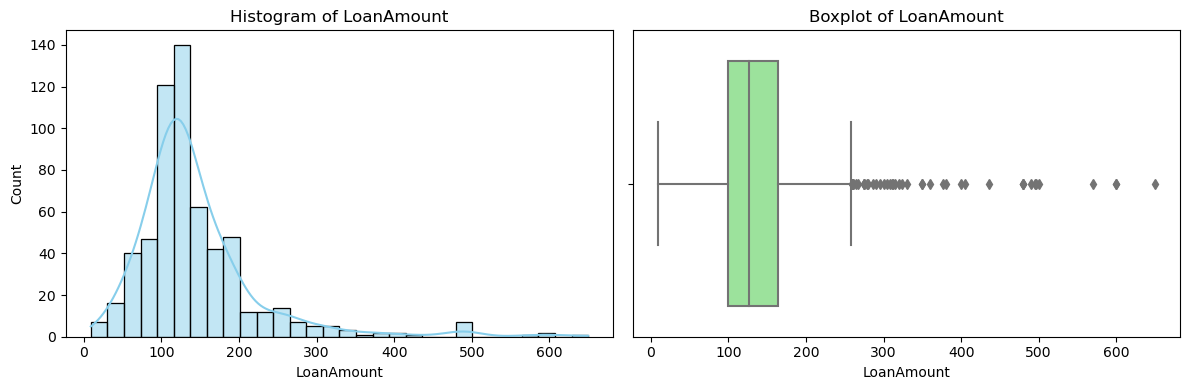

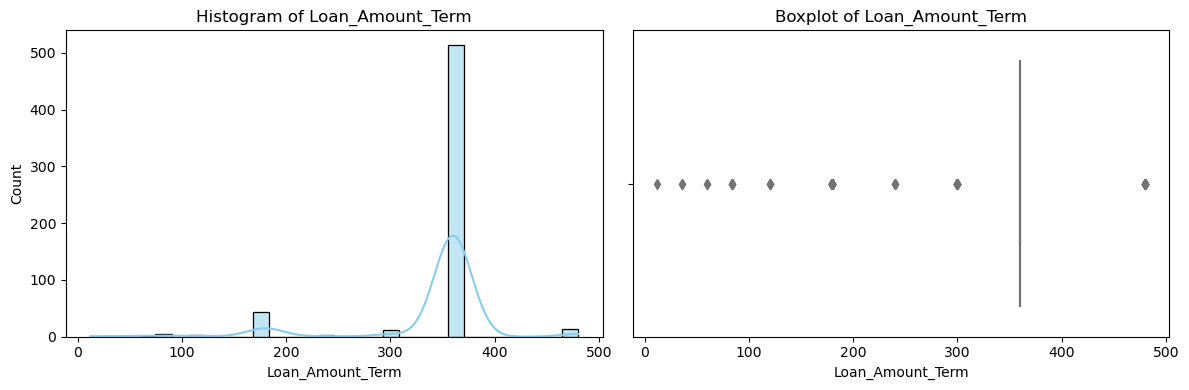

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

# Handle missing categorical values
categorical_with_missing = ['Credit_History', 'Dependents']
for col in categorical_with_missing:
    if col in missing_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Handle missing numerical values
numerical_with_missing = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_with_missing:
    if col in missing_cols:
        df[col].fillna(df[col].median(), inplace=True)
df.head()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude columns with too few unique values (e.g., ≤ 5)
filtered_cols = [col for col in numeric_cols if df[col].nunique() > 5]

# Plot histograms and boxplots side-by-side
for col in filtered_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with bin control
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


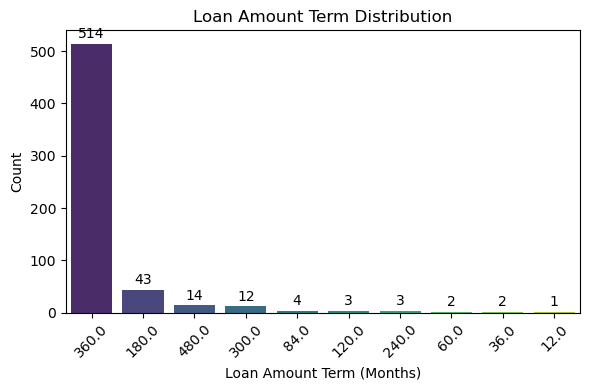

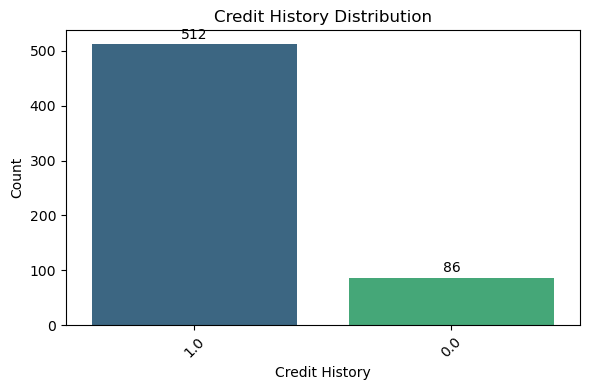

In [4]:

# Convert to string to avoid numeric scaling on x-axis
df['Loan_Amount_Term_str'] = df['Loan_Amount_Term'].astype(str)

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Loan_Amount_Term_str', order=df['Loan_Amount_Term_str'].value_counts().index, palette='viridis')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Credit_History_str'] = df['Credit_History'].astype(str)

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Credit_History_str', order=df['Credit_History_str'].value_counts().index, palette='viridis')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Credit History Distribution')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\matet\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


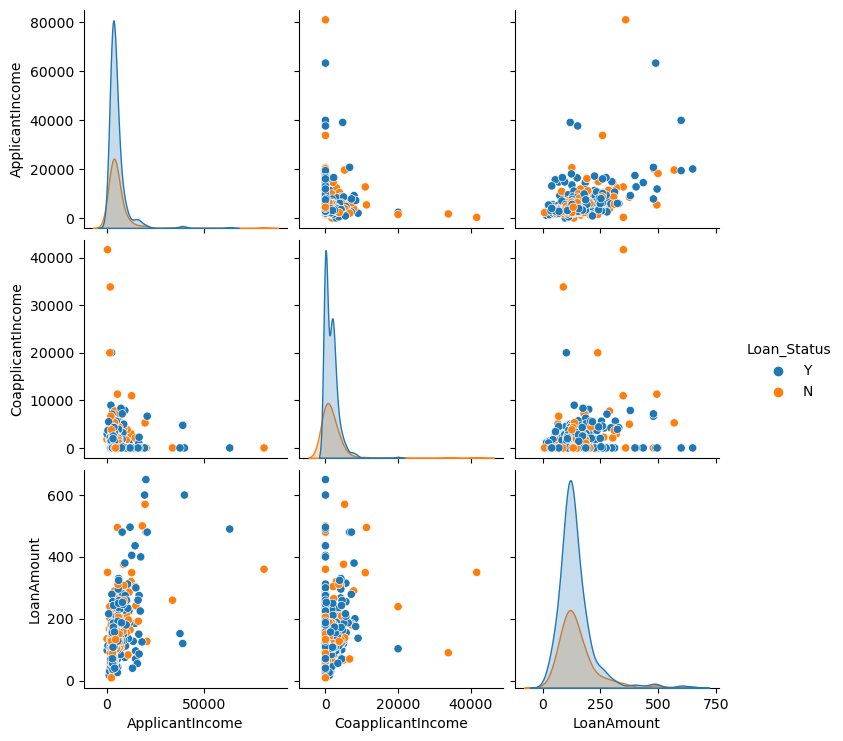

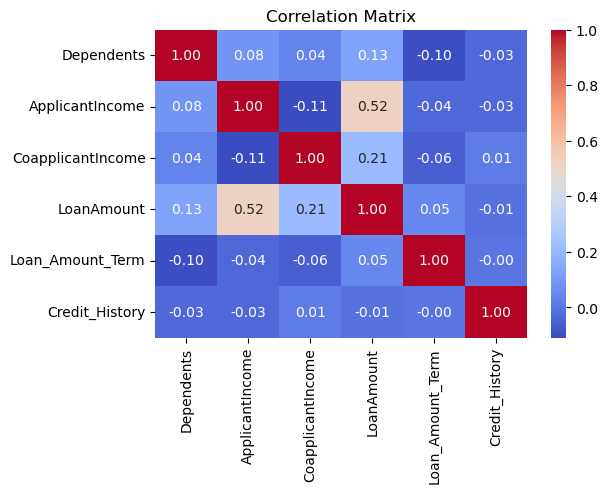

In [6]:
selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']
sns.pairplot(df[selected_features], hue='Loan_Status')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


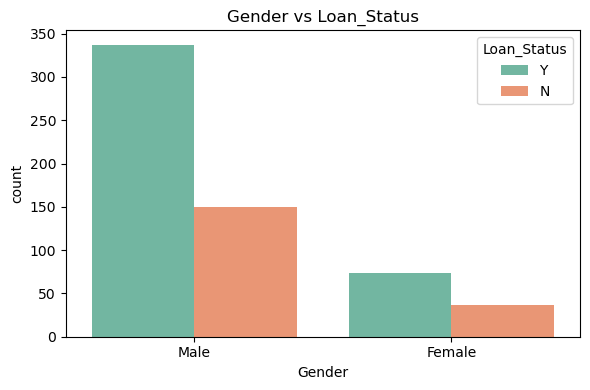

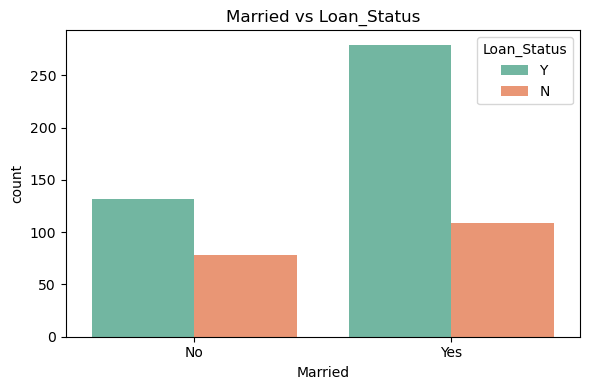

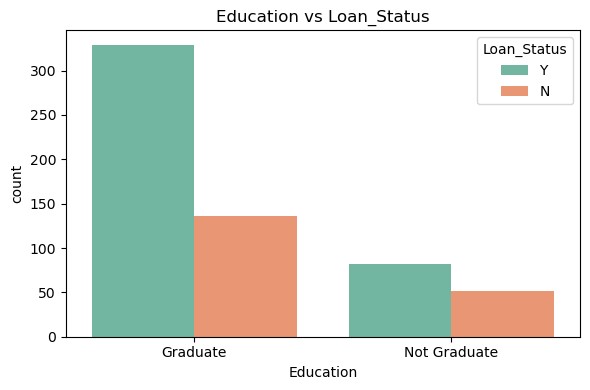

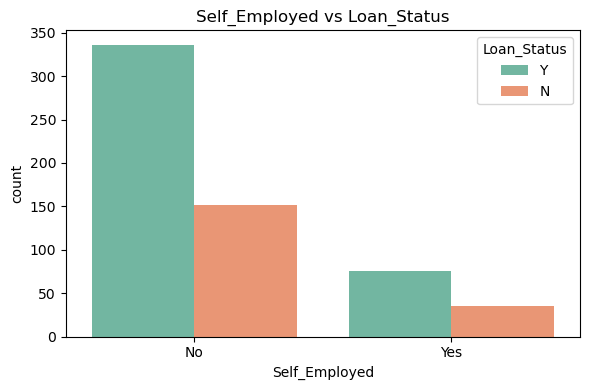

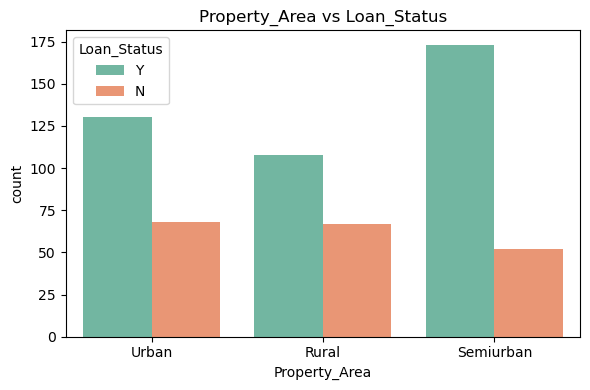

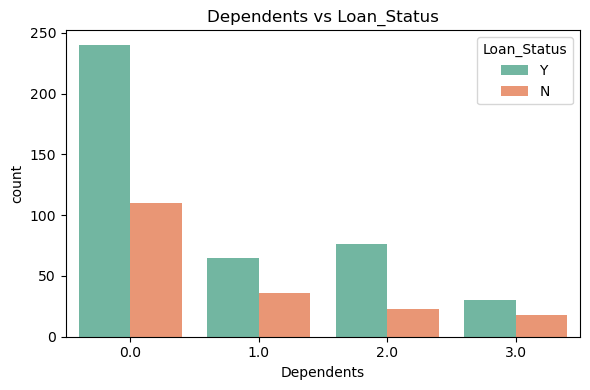

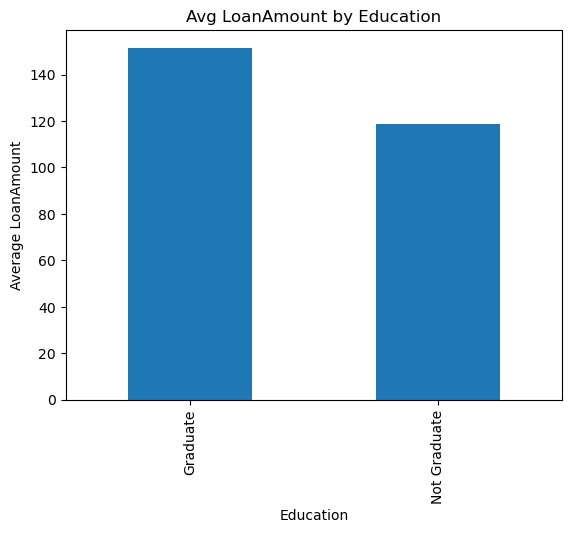

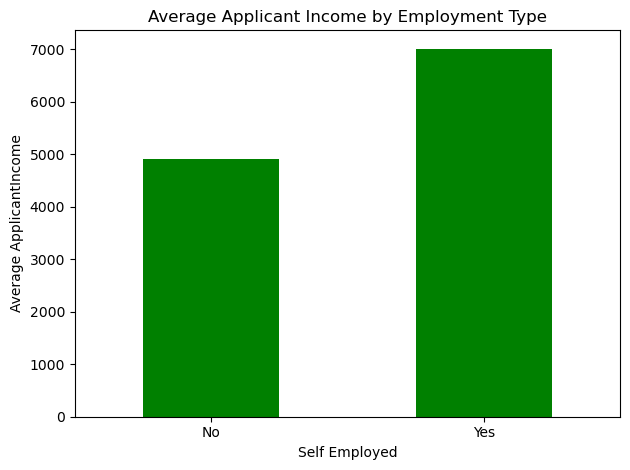

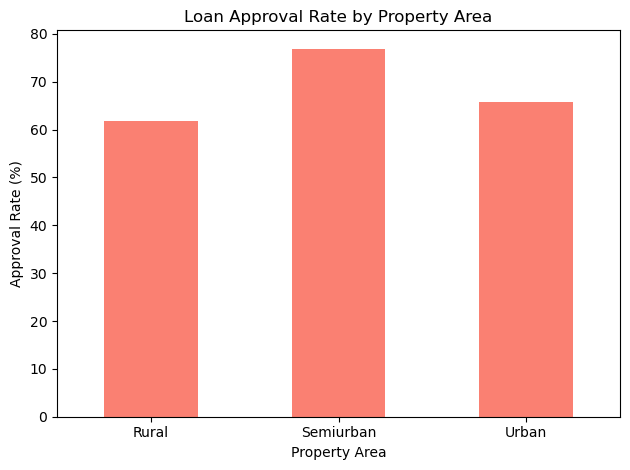

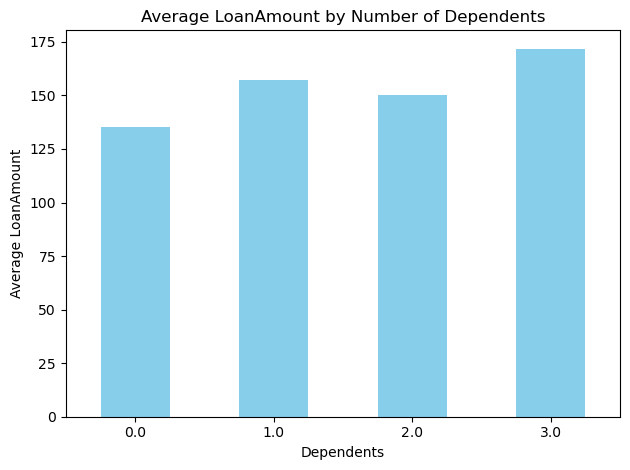

In [7]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 
                        'Property_Area', 'Dependents']

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'{col} vs Loan_Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    
df.groupby('Education')['LoanAmount'].mean().plot(kind='bar', title='Avg LoanAmount by Education')
plt.ylabel("Average LoanAmount")
plt.show()

df.groupby('Self_Employed')['ApplicantIncome'].mean().plot(kind='bar', color='green')
plt.title('Average Applicant Income by Employment Type')
plt.ylabel('Average ApplicantIncome')
plt.xlabel('Self Employed')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

loan_approval = df[df['Loan_Status'] == 'Y'].groupby('Property_Area')['Loan_Status'].count()
total_applications = df.groupby('Property_Area')['Loan_Status'].count()
approval_rate = (loan_approval / total_applications) * 100

approval_rate.plot(kind='bar', color='salmon')
plt.title('Loan Approval Rate by Property Area')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df.groupby('Dependents')['LoanAmount'].mean().plot(kind='bar', color='skyblue')
plt.title('Average LoanAmount by Number of Dependents')
plt.ylabel('Average LoanAmount')
plt.xlabel('Dependents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
